# Chapter 9: Practical Python: Advanced Topics


## Dependency Management


In the IT world, most complex programs depend on libraries beyond the Python standard library. You may use **numpy** or **pandas** to deal with multidimensional data or **matplotlib** to visualize data in graphs (this will be covered in Chapter 10, Data Analytics with pandas and NumPy), or any number of other libraries available to Python developers.

Just like your own software, the libraries developed by other teams frequently change as bugs are fixed, features are added, and old code is removed or refactored, which is the process of restructuring existing code. That means it's important that your team uses the same version of a library so that it works in the same way for all of them.

Additionally, you want your customers or the servers where you deploy your software to use the same versions of the same libraries as well, so that everything works the same way on their computers, too.

There are multiple tools for solving this problem. These include **pip, easy_install, brew,** and **conda**, to name a few. You are already familiar with **pip**, and in some contexts, it suffices to use this package manager to keep track of dependencies.

For instance, try running **pip freeze** on Command Prompt. You should get the following output:

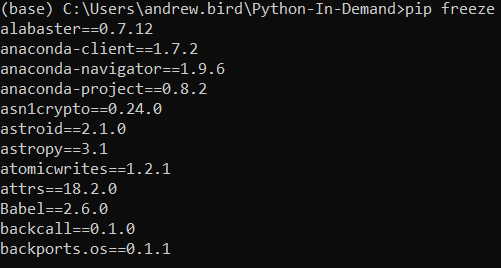

This package list could be saved to a text file with the following command:** pip freeze > requirements.txt**. This will create a file called requirements.txt, which will be similar to Figure 9.9:

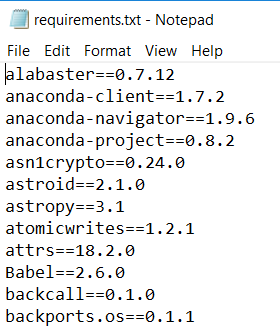

Now that you have the information about the packages, you can choose to install these packages on another machine or environment with the following command: **pip install -r requirements.txt**.

In this chapter, you will focus on **conda**, which provides a complete solution for dependency management. conda is particularly popular among data scientists and machine learning programmers. For instance, some dependencies in machine learning environments can't be managed by **pip**, as they might not be a simple Python package. conda takes care of these for us.

## Virtual Environments


In this chapter, you will use conda to create "virtual environments." When you code in Python, you have certain versions of certain packages installed. You're also using a specific version of Python itself, which is 3.7. However, what if you are working on two projects, with each requiring different versions of the packages? You would need to reinstall all of the packages when switching between these projects, which would be a hassle. Virtual environments address this problem. A virtual environment contains a set of particular packages at specific versions. By switching between virtual environments, you can switch between different packages and versions instantly. Typically, you will have a different virtual environment for each major project you are working on.

##Exercise 118: Creating and Setting Up a conda Virtual Environment to Install numpy and pandas

In this exercise, you'll create a virtual environment with **conda** and execute some simple code to import basic libraries. This exercise will be performed in the **conda** environment.


**Note:** If you have not already installed Anaconda, refer to the Installation and Setup section for installation instructions.

Now, with **conda** installed on your system, you can create a new **conda** environment and include packages in it; for example, numpy.

1. Now you should run the following command using the **Anaconda** Prompt program, which is now installed on your computer:

In [ ]:
conda create -n example_env numpy


You should get the following output:
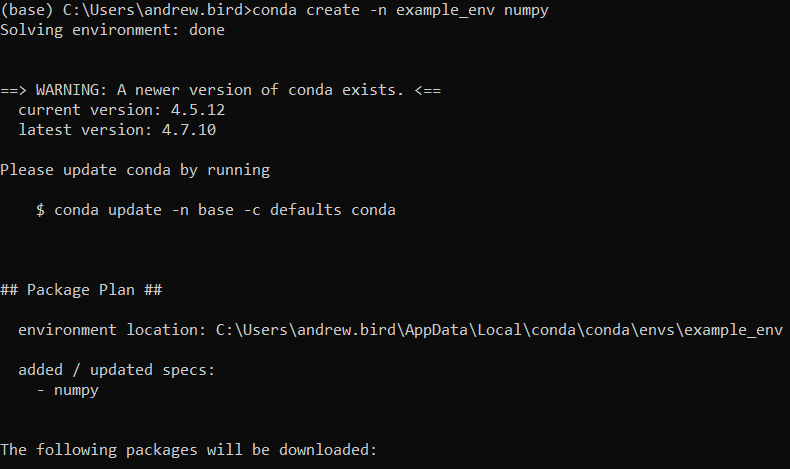

**Note:** If you are asked to enter y/n by the prompt, you need to enter y to proceed further.


2. Activate the **conda** environment:


In [ ]:
conda activate example_env


You can add other packages to the environment with conda install.

3. Now, add **pandas** to the **example_env** environment:

In [ ]:
conda install pandas


You should get the following output:

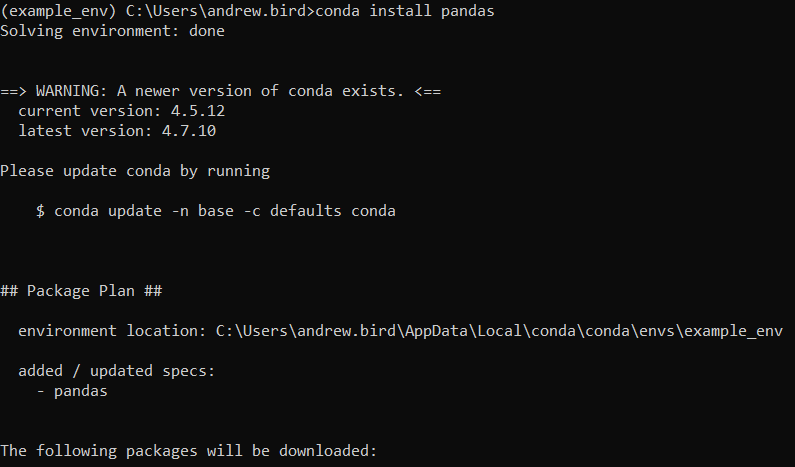

**Note:** The preceding output is truncated.

4. Next, open a **Python** terminal within the virtual environment by typing in **python** and then verify that you can import **pandas** as numpy as expected:

In [ ]:
python
import pandas as pd
import numpy as np

5. Now, **exit** the Python terminal in the virtual environment using the **exit()** method:


In [ ]:
exit()


6. Finally, deactivate the virtual environment:


In [ ]:
conda deactivate


**Note:** You may have noticed the $ sign in the prompts. While working on the prompt, you need to ignore the $ sign. The $ sign is just to mention that the command will be executed on the terminal.

In this exercise, you created your first virtual environment using **conda**, installed packages such as **numpy** and **pandas**, and ran simple Python code to import libraries.

## Saving and Sharing Virtual Environments


Now, suppose you have built an application that relies on various Python packages. You now decide that you want to run the application on a server, so you want a way of setting up the same virtual environment on the server as you have running on your local machine. As you previously encountered with **pip freeze**, the metadata defining a **conda** environment can be easily exported to a file that can be used to recreate an identical environment on another computer.

## Exercise 119: Sharing Environments between a conda Server and Your Local System



In this exercise, you will export the metadata of our **example_env** conda environment, which you created in Exercise 118, Creating and Setting Up a conda Virtual Environment to Install **numpy** and pandas, to a text file and learn how to recreate the same environment using this file.
This exercise will be performed on the **conda** environment command line:

1. Activate your example environment, for **example_env**:




In [ ]:
conda activate example_env


2. Now, export the environment to a text file:


In [ ]:
conda env export > example_env.yml


The **env export** command produces the text metadata (which is mainly just a list of Python package versions), and the **> example_env.yml** part of the command stores this text in a file. Note that the .yml extension is a special easy-to-read file format that is usually used to store configuration information.

3. Now deactivate that environment and remove it from **conda**:


In [ ]:
conda deactivate
conda env remove --name example_env

4. You no longer have an **example_env** environment, but you can recreate it by importing the **example_env.yml** file you created earlier in the exercise:


In [ ]:
conda env create -f example_env.yml 

**Note:** To access the source code for this specific section, please refer GitHub. This section does not currently have an online interactive example, and will need to be run locally.

You have now learned how to save your environment and create an environment using the saved file. In the next section, you will look at multiprocessing.

## Multiprocessing


It's common to need to execute more than one thing in parallel in a modern software system. Machine learning programs and scientific simulations benefit from using the multiple cores available in a modern processor, dividing their work up between concurrent threads operating on the parallel hardware. Graphical user interfaces and network servers do their work "in the background," leaving a thread available to respond to user events or new requests.

As a simple example, suppose your program had to execute three steps: A, B, and C. These steps are not dependent on each other, meaning they can be completed in any order. Usually, you would simply execute them in order, as follows:

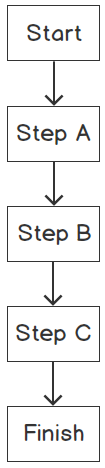

Figure 9.12: Processing with a single thread


However, what if you could do all of these steps at the same time, rather than waiting for one to complete before moving onto the next? Our workflow would look like this:



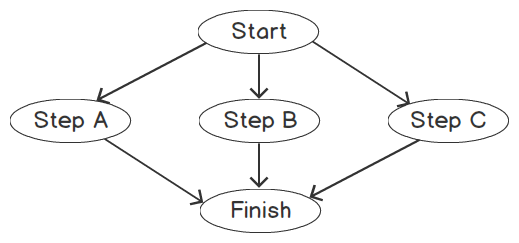

Figure 9.13: Multithreaded processing


This has the potential to be a lot faster if you have the infrastructure to execute these steps at the same time. That is, each step will need to be executed by a different thread.

Python itself uses multiple threads to do some work internally, which puts some limits on the ways in which a Python program can do multiprocessing. The three safest ways to work are as follows:


*  Find a library that solves your problem and handles multiprocessing for you 
(which has been carefully tested).
*  Launch a new Python interpreter by running another copy of your script as a completely separate process.
* Create a new thread within the existing interpreter to do some work concurrently.


The first of these is the easiest and the most likely to be a success. The second is fairly simple and imposes the most overhead on your computer as the operating system is now running two independent Python scripts. The third is very complicated, easy to get wrong, and still creates a lot of overhead as Python maintains a Global Interpreter Lock (GIL), which means that only one thread at a time can interpret a Python instruction. A quick rule of thumb to choose between the three approaches is to always pick the first one. If a library doesn't exist to address your needs, then pick the second. If you absolutely need to share memory between the concurrent processes, or if your concurrent work is related to handling I/O, then you can choose the third carefully.

## Multiprocessing with execnet


It's possible to launch a new Python interpreter with the standard library's **subprocess** module. However, doing so leaves a lot of work up to you about what code to run and how to share data between the "parent" and "child" Python scripts.

An easier interface is the **execnet** library. **execnet** makes it very easy to launch a new Python interpreter running some given code, including versions such as **Jython** and **IronPython**, which integrate with the Java virtual machine and .NET common language runtime, respectively. It exposes an asynchronous communication channel between the parent and child Python scripts, so the parent can send data that the child works on and get on with its own thing until it's ready to receive the result. If the parent is ready before the child is finished, then the parent waits.

## Exercise 120: Working with execnet to Execute a Simple Python Squaring



In this exercise, you'll create a squaring process that receives x over an execnet channel and responds with x**2. This is much too small a task to warrant multiprocessing, but it does demonstrate how to use the library.

This exercise will be performed on a Jupyter notebook:



1. First, install **execnet** using the **pip** package manager:


In [ ]:
! pip install execnet


2. Write the square function, which receives numbers on a channel and returns their square:

In [ ]:
import execnet
def square(channel):
    while not channel.isclosed():
        number = channel.receive()
        number_squared = number**2
        channel.send(number_squared) 

Note: Due to the way execnet works, you must type the following examples into a Jupyter notebook. You cannot type them into the interactive prompt.

The while not channel.isclosed() statement ensures that we only proceed with the calculation if there is an open channel between the parent and child Python processes. number = channel.receive() takes the input from the parent process that you want to square. It is then squared in the number_squared = number**2 code line. Lastly, you send the squared number back to the parent process with channel.send(number_squared).

3. Now set up a gateway channel to a remote Python interpreter running that function:


In [ ]:
gateway = execnet.makegateway()
channel = gateway.remote_exec(square)

A gateway channel manages the communication between the parent and child Python processes. The channel is used to actually send and receive data between the processes.
4. Now send some integers from our parent process to the child process, as shown in the following code snippet:

In [ ]:
for i in range(10):
    channel.send(i)
    i_squared = channel.receive()
    print(f"{i} squared is {i_squared}")

0 squared is 0
1 squared is 1
2 squared is 4
3 squared is 9
4 squared is 16
5 squared is 25
6 squared is 36
7 squared is 49
8 squared is 64
9 squared is 81


Here, you loop through 10 integers, send them through the square channel, and then receive the result using the **channel.receive()** function.
When you are done with the remote Python interpreter, close the **gateway channel** to cause it to quit:

In [ ]:
gateway.exit()



In this exercise, you learned how to use execnet to pass instructions between Python processes. In the next section, you will be looking at multiprocessing with the multiprocessing package.

## Multiprocessing with the Multiprocessing Package


The **multiprocessing** module is built into Python's standard library. Similar to execnet, it allows you to launch new Python processes. However, it provides an API that is lower-level than execnet. This means that it's harder to use than execnet, but affords more flexibility. An execnet channel can be simulated by using a pair of multiprocessing queues.

In this exercise, you will use the **multiprocessing** module to complete the same task as in Exercise 120, Working with execnet to Execute a Simple Python Squaring Program:

1. Create a new text file called **multi_processing.py**.

2. Now, import the **multiprocessing** package:

In [ ]:
import multiprocessing


3. Create a **square_mp** function that will continuously monitor the queue for numbers, and when it sees a number, it will take it, square it, and place it in the outbound queue:

In [ ]:
def square_mp(in_queue, out_queue):
    while(True):
        n = in_queue.get()
        n_squared = n**2
        out_queue.put(n_squared) 

4. Finally, add the following block of code to multi_processing.py:



In [ ]:
if __name__ == '__main__':
    in_queue = multiprocessing.Queue()
    out_queue = multiprocessing.Queue()
    process = multiprocessing.Process(target=square_mp, args=(in_queue, out_queue))
    process.start()
    for i in range(10):
        in_queue.put(i)
        i_squared = out_queue.get()
        print(f"{i} squared is {i_squared}")
    process.terminate()

0 squared is 0
1 squared is 1
2 squared is 4
3 squared is 9
4 squared is 16
5 squared is 25
6 squared is 36
7 squared is 49
8 squared is 64
9 squared is 81


Recall that the if name == '__main__' line simply avoids executing this section of code if the module is being imported elsewhere in your project. In comparison, in_queue and out_queue are both queue objects through which data can be sent between the parent and child processes. Within the following loop, you can see that you add integers to in_queue and get the results from out_queue. If you look at the preceding square_mp function, you can see how the child process will get its values from the in_queue object, and pass the result back into the out_queue object.

5. Execute your program from the command line as follows:


In [ ]:
python multi_processing.py


You should get the following output:

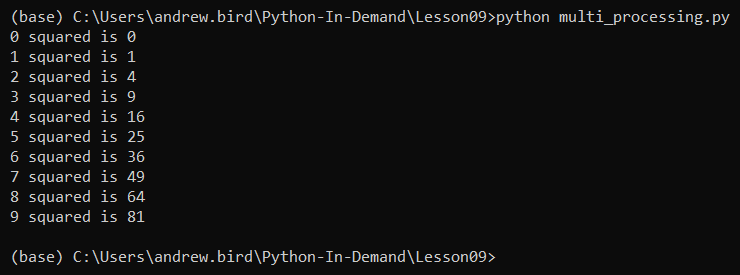

In this exercise, you learned how to pass tasks between our parent and child Python processes using the multiprocessing package, and you found the square of a set of numbers.

## Multiprocessing with the Threading Package


Whereas **multiprocessing** and **execnet** create a new Python process to run your asynchronous code, threading simply creates a new thread within the current process. It, therefore, uses fewer operating resources than alternatives. Your new thread shares all memory, including global variables, with the creating thread. The two threads are not truly concurrent, because the GIL means only one Python instruction can be running at once across all threads in a Python process.

Finally, you cannot terminate a **thread**, so unless you plan to exit your whole Python process, you must provide the thread function with a way to exit. In the following exercise, you'll use a special signal value sent to a queue to exit the thread.

## Exercise 122: Using the Threading Package



In this exercise, you will use the **threading** module to complete the same task of squaring numbers as in Exercise 120, Working with execnet to Execute a Simple Python Squaring Program:



1. In a Jupyter notebook, import the **threading** and queue modules:


In [ ]:
import threading
import queue

2. Create two new **queues** to handle the communication between our processes, as shown in the following code snippet:


In [ ]:
in_queue = queue.Queue()
out_queue = queue.Queue()

3. Create the function that will watch the queue for new numbers and return squared numbers. The **if n == 'STOP'** line allows you to terminate the thread by passing **STOP** into the **in_queue** object:

In [ ]:
def square_threading():
    while True:
        n = in_queue.get()
        if n == 'STOP':
            return
        n_squared = n**2
        out_queue.put(n_squared)

4. Now, create and start a new thread:


In [ ]:
thread = threading.Thread(target=square_threading)
thread.start() 

5. Loop through **10** numbers, pass them into the **in_queue** object, and receive them from the **out_queue** object as the expected output:

In [ ]:
for i in range(10):
    in_queue.put(i)
    i_squared = out_queue.get()
    print(f"{i} squared is {i_squared}")
in_queue.put('STOP')
thread.join()

0 squared is 0
1 squared is 1
2 squared is 4
3 squared is 9
4 squared is 16
5 squared is 25
6 squared is 36
7 squared is 49
8 squared is 64
9 squared is 81


In this exercise, you learned how to pass tasks between our parent and child Python processes using the threading package. In the next section, you will look at parsing command-line arguments in scripts.

## Parsing Command-Line Arguments in Scripts

Scripts often need input from their user in order to make certain choices about what the script does or how it runs. For instance, consider a script to train a deep learning network used for image classification. A user of this script will want to tell it where the training images are, what the labels are, and may want to choose what model to use, the learning rate, where to save the trained model configuration, and other features.

It's conventional to use command-line arguments; that is, values that the user supplies from their shell or from their own script when running your script. Using command-line arguments makes it easy to automate using the script in different ways and will be familiar to users who have experience of using the Unix or Windows command shells.

Python's standard library module for interpreting command-line arguments, **argparse**, supplies a host of features, making it easy to add argument handling to scripts in a fashion that is consistent with other tools. You can make arguments required or optional, have the user supply values for certain arguments, or define default values. **argparse** creates usage text, which the user can read using the **--help argument**, and checks the user-supplied arguments for validity.

Using **argparse** is a four-step process. First, you create a **parser** object. Second, you add arguments your program accepts to the **parser** object. Third, tell the **parser** object to parse your script's **argv** (short for argument vector, the list of arguments that were supplied to the script on launch); it checks them for consistency and stores the values. Finally, use the object returned from the **parser** object in your script to access the values supplied in the arguments.

To run all of the exercises in this section, later on, you will need to type the Python code into the .py files and run them from your operating system's command line, not from a Jupyter notebook.

## Exercise 123: Introducing argparse to Accept Input from the User



In this exercise, you'll create a program that uses **argparse** to take a single input from the user called **flag**. If the **flag** input is not provided by the user, its value is **False**. If it is provided, its value is **True**. This exercise will be performed in a Python terminal:

1. Create a new Python file called **argparse_demo.py**.

2. Import the argparse **library**:


In [ ]:
import argparse

3. Create a new **parser** object, as shown in the following code snippet:


In [ ]:
parser = argparse.ArgumentParser(description="Interpret a Boolean flag.")


4. Add an argument that will allow the user to pass through the **–-flag** argument when they execute the program:

In [ ]:
parser.add_argument('--flag', dest='flag', action='store_true', help='Set the flag value to True.')

_StoreTrueAction(option_strings=['--flag'], dest='flag', nargs=0, const=True, default=False, type=None, choices=None, help='Set the flag value to True.', metavar=None)

The **store_true** action means that the parser will set the value of the argument to True if the flag input is present. If the flag input is not present, it will set the value to False. The exact opposite can be achieved using the **store_false** action.

5. Now call the **parse_args()** method, which executes the actual processing of the arguments:

In [ ]:
arguments = parser.parse_args()

6. Now, print the value of the argument to see whether it worked:


In [ ]:
print(f"The flag's value is {arguments.flag}")


7. execute the file with no arguments supplied; the value of **arguments.flag** should be **False**:

In [ ]:
python argparse_example.py

You should get the following output:

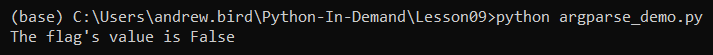

8. Run the script again, with the **--flag** argument, to set it to **True**:


In [ ]:
python argparse_demo.py –-flag


You should get the following output:
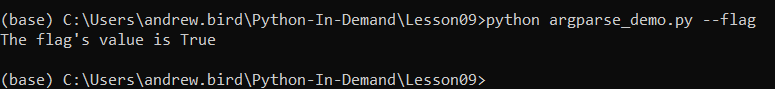

9. Now enter the following code and see the **help** text that **argparse** extracted from the description and **help** text you supplied:

In [ ]:
python argparse_demo.py –-help


You should get the following output:

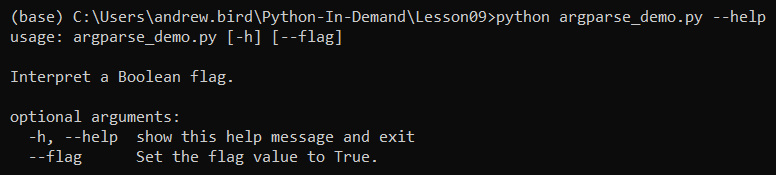

You have successfully created a script that allows an argument to be specified when it is executed. You can probably imagine how useful this can often be.




## Positional Arguments


Some scripts have arguments that are fundamental to their operation. For example, a script that copies a file always needs to know the **source** file and **destination** file. It would be inefficient to repetitively type out the names of the arguments; for instance, **python copyfile.py --source infile --destination outfile**, every time you use the script.

You can use positional arguments to define arguments that the user does not name but always provides in a particular order. The difference between a positional and a named argument is that a named argument starts with a hyphen (-), such as **--flag** in Exercise 123, Introducing argparse to Accept Input from the User. A positional argument does **not** start with a hyphen.

## Exercise 124: Using Positional Arguments to Accept Source and Destination Inputs from a User

In this exercise, you will create a program that uses **argparse** to take two inputs from the user: **source** and **destination**.

This exercise will be performed in a Python terminal:

1. Create a new Python file called **positional_args.py**.

2. Import the **argparse** library:


In [ ]:
import argparse

3. Create a new parser object:


In [ ]:
parser = argparse.ArgumentParser(description="Interpret positional arguments.")

4. Add two **arguments** for the **source** and destination values:


In [ ]:
parser.add_argument('source', action='store', help='The source of an operation.')
parser.add_argument('dest', action='store', help='The destination of the operation.')

5. Call the **parse_args()** method, which executes the actual processing of arguments:


In [ ]:
arguments = parser.parse_args()


6. Now, **print** the **value** of arguments so that you can see whether it worked:


In [ ]:
print(f"Picasso will cycle from {arguments.source} to {arguments.dest}")


7. Now, execute the file while using this script with no arguments, which causes an error because it expects two **positional** arguments:


In [ ]:
python positional_args.py

You should get the following output:

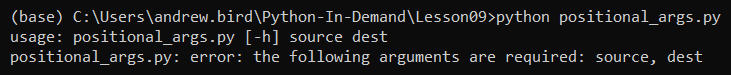

8. Try running the script and specifying two locations as the source and destination positional arguments.


In [ ]:
$ python positional_args.py Chichester Battersea


You should get the following output:

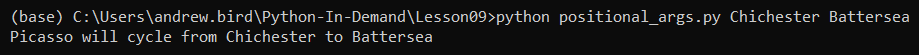

In this exercise, you learned how to parameterize your scripts by accepting positional arguments using the argparse Python package.

## Performance and Profiling


Python is not often thought of as a high-performance language, though it really should be. The simplicity of the language and the power of its standard library mean that the time from idea to result can be much shorter than in other languages with better runtime performance.

But we have to be honest. Python is not among the fastest-running programming languages in the world, and sometimes that's important. For instance, if you're writing a web server application, you need to be able to handle as many network requests as are being made, and with timeliness that satisfies the users making the requests.

Alternatively, if you're writing a scientific simulation or a deep learning inference engine, then the simulation or training time can completely dwarf the programmer time (which is your time) spent writing the code. In any situation, reducing the time spent running your application can decrease the cost, whether measured in dollars on your cloud hosting bill or in milliamp-hours on your laptop battery.

## Changing Your Python


You'll learn how to use some of Python's timing and profiling tools later on in this section. Before that, you can consider whether you even need to do that. Taligent, an object-oriented software company in the 1990s, had a performance saying: "There is no code faster than no code." You can generalize that idea as follows:

There is no work that can be done faster than doing no work.

The fastest way to speed up your Python program can often be to simply use a different Python interpreter. You saw earlier in this chapter that multithreaded Python is slowed down by **GIL**, which means that only one Python thread can be executing a Python instruction at any time in a given process. The **Jython** and **IronPython** environments, targeting the Java Virtual Machine and .NET common language runtime, do not have **GIL**, so they may be faster for multithreaded programs. But there are also two Python implementations that are specifically designed to perform better, so you'll look to those for assistance in later sections.

## PyPy

You will now look in more detail at another Python environment. It's called pypy, and Guido van Rossum (Python's creator) has said: "If you want your code to run faster, you should probably just use PyPy."

PyPy's secret is **Just-in-time (JIT)** compilation, which compiles the Python program to a machine language such as Cython but does it while the program is running rather than once on the developer's machine (called ahead-of-time, or AOT, compilation). For a long-running process, a JIT compiler can try different strategies to compile the same code and find the ones that work best in the program's environment. The program will quickly get faster until the best version the compiler can find is running. Take a look at PyPy in the following exercise.

## Exercise 125: Using PyPy to Find the Time to Get a List of Prime Numbers



In this exercise, you will be executing a Python program to get a list of prime numbers using milliamp-hours. But remember that you are more interested in checking the amount of time needed to execute the program using PyPy.

This exercise will be performed in a Python terminal.


> **Note:** You need to install pypy for your operating system. Go to this [link](https://pypy.org/download.html) and make sure to get the version that is compatible with the version of Python installed on your system.







1. First, run the **pypy3 command**, as shown in the following code snippet:


In [ ]:
pypy3
Python 3.6.1 (dab365a465140aa79a5f3ba4db784c4af4d5c195, Feb 18 2019, 10:53:27)
[PyPy 7.0.0-alpha0 with GCC 4.2.1 Compatible Apple LLVM 10.0.0 (clang-1000.11.45.5)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
And now for something completely different: ''release 1.2 upcoming''
>>>>

Note that you may find it easier to navigate to the folder with the pypy3.exe file and run the preceding command, instead of following the installation instructions to create a symlink.

2. Press Ctrl + D to exit **pypy**. You're going to use the program from Chapter 7, Becoming Pythonic, again, which finds prime numbers using the Sieve of Eratosthenes method. There are two changes that you will introduce here: firstly, find prime numbers up to 1,000 to give the program more work to do; secondly, instrument it with Python's **timeit** module so that you can see how long it takes to run. **timeit** runs a Python statement multiple times and records how long it takes. Tell **timeit** to run your Sieve of Eratosthenes 10,000 times (the default is 100,000 times, which takes a very long time).

3. Create a eratosthenes.py file and enter the following code:


In [ ]:
import timeit
class PrimesBelow:
    def __init__(self, bound):
        self.candidate_numbers = list(range(2,bound))
    def __iter__(self):
        return self
    def __next__(self):
        if len(self.candidate_numbers) == 0:
            raise StopIteration
        next_prime = self.candidate_numbers[0]
        self.candidate_numbers = [x for x in self.candidate_numbers if x % next_prime != 0]
        return next_prime
print(timeit.timeit('list(PrimesBelow(1000))', setup='from __main__ import PrimesBelow',
  number=10000)) 

4. Run the file with the regular Python interpreter:


In [ ]:
python eratosthenes.py 


You should get the following output:

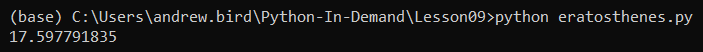

The number will be different on your computer, but that's **17.6** seconds to execute the **list(PrimesBelow(1000))** statement 10,000 times, or 1,760 µs per iteration. Now, run the same program, using pypy instead of CPython:

> $ pypy3 eratosthenes.py

You should get the following output:

> 4.81645076300083

Here, it is **482 µs** per iteration.

In this exercise, you will have noticed that it only takes 30% of the time to run our code in **pypy** as it took in Python. You really can get a lot of performance boost with very little effort, just by switching to **pypy**.

## Cython

A Python module can be compiled to C, with a wrapper that means it is still accessible from other Python code. Compiling code simply means it is taken from one language and put into another. In this case, the compiler takes Python code and expresses it in the C programming language. The tool that does this is called Cython, and it often generates modules with lower memory use and execution time than if they're left as Python.

> **Note:** The standard Python interpreter, the one you've almost certainly been using to complete the exercises and activities in this course, is sometimes called "CPython." This is confusingly similar to "Cython," but the two really are different projects.



## Exercise 126: Adopting Cython to Find the Time Taken to get a List of Prime Numbers



In this exercise, you will install Cython, and, as mentioned in Exercise 125, Using PyPy to Find the Time to Get a List of Prime Numbers, you will find a list of prime numbers, but you are more interested in knowing the amount of time it takes to execute the code using Cython.

This exercise will be performed on the command line:

1. Firstly, install **cython**, as shown in the following code snippet:


In [ ]:
! pip install cython

2. Now, go back to the code you wrote for Exercise 8, Displaying String, and extract the class for iterating over primes using the Sieve of Eratosthenes into a file, **sieve_module.py**:

In [ ]:
class PrimesBelow:
    def __init__(self, bound):
        self.candidate_numbers = list(range(2,bound))
    def __iter__(self):
        return self
    def __next__(self):
        if len(self.candidate_numbers) == 0:
            raise StopIteration
        next_prime = self.candidate_numbers[0]
        self.candidate_numbers = [x for x in self.candidate_numbers if x % next_prime != 0]
        return next_prime 

3. Compile that into a C module using **Cython**. Create a file called **setup.py** with the following contents:


In [ ]:
from distutils.core import setup
from Cython.Build import cythonize
# setup(ext_modules = cythonize("sieve_module.py")) have error

4. Now, on the command line, run **setup.py** to build the module, as shown in the following code snippet:

In [ ]:
$ python setup.py build_ext --inplace
running build_ext
building 'sieve_module' extension
creating build
creating build/temp.macosx-10.7-x86_64-3.7
gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/Users/leeg/anaconda3/include -arch x86_64 -I/Users/leeg/anaconda3/include -arch x86_64 -I/Users/leeg/anaconda3/include/python3.7m -c sieve_module.c -o build/temp.macosx-10.7-x86_64-3.7/sieve_module.o
gcc -bundle -undefined dynamic_lookup -L/Users/leeg/anaconda3/lib -arch x86_64 -L/Users/leeg/anaconda3/lib -arch x86_64 -arch x86_64 build/temp.macosx-10.7-x86_64-3.7/sieve_module.o -o /Users/leeg/Nextcloud/Documents/Python Book/Lesson_9/sieve_module.cpython-37m-darwin.so

The output will look different if you're on Linux or Windows, but you should see no errors.

5. Now import the **timeit** module and use it in a script called **cython_sieve.py**:

In [ ]:
import timeit
# print(timeit.timeit('list(PrimesBelow(1000))', setup='from sieve_module import PrimesBelow', number=10000)) have error

6. Run this program to see the timing:

In [ ]:
$ python cython_sieve.py 

Here, it is 3.83 seconds, so 383 µs per iteration. That's a little over 40% of the time taken by the CPython version, but the **pypy** Python was still able to run the code faster. The advantage of using Cython is that you are able to make a module that is compatible with CPython, so you can make your module code faster without the need to make everybody else switch to a different Python interpreter to reap the benefits.

## Profiling

Having exhausted the minimum-effort options for improving your code's performance, it's time to actually put some work in if you need to go faster. There's no recipe to follow to write fast code: if there were, you could have taught you that in Chapters 1-8 and there wouldn't need to be a section on performance now. And, of course, speed isn't the only performance goal: you might want to reduce memory use or increase the number of simultaneous operations that can be in-flight. But programmers often use "performance" as a synonym for "reducing time to completion," and that's what you'll investigate here.

Improving performance is a scientific process: you observe how your code behaves, hypothesize about a potential improvement, make the change, and then observe it again and check that you really did improve things. Good tool support exists for the observation steps in this process, and you'll look at one such tool now: cProfile.

cProfile is a module that builds an execution profile of your code. Every time your Python program enters or exits a function or other callable, cProfile records what it is and how long it takes. It's then up to you to work out how it could spend less time doing that. Remember to compare a profile recorded before your change with one recorded after, to make sure you improved things! As you'll see in the next exercise, not all "optimizations" actually make your code faster, and careful measurement and thought are needed to decide whether the optimization is worth pursuing and retaining. In practice, cProfile is often used when trying to understand why code is taking longer than expected to execute. For example, you might write an iterative calculation that suddenly takes 10 minutes to compute after scaling to 1,000 iterations. With cProfile, you might discover that this is due to some inefficient function in the pandas library, which you could potentially avoid to speed up your code.

## Profiling with cProfile


The goal of this example is to learn how to diagnose code performance using cProfile. In particular, to understand which parts of your code are taking the most time to execute.

This is a pretty long example, and the point is not to make sure that you type in and understand the code but to understand the process of profiling, to consider changes, and to observe the effects those changes have on the profile. This example will be performed on the command line:

1. Start with the code you wrote in Chapter 7, Becoming Pythonic, to generate an infinite series of prime numbers:

In [ ]:
class Primes:
    def __init__(self):
        self.current = 2
    def __iter__(self):
        return self
    def __next__(self):
        while True:
            current = self.current
            square_root = int(current ** 0.5)
            is_prime = True
            if square_root >= 2:
                for i in range(2, square_root + 1):
                    if current % i == 0:
                        is_prime = False
                        break
            self.current += 1
            if is_prime:
                return current

2. You'll remember that you had to use **itertools.takewhile()** to turn this into a finite sequence. Do so to generate a large list of primes and use cProfile to investigate its performance:

In [ ]:
import cProfile
import itertools
cProfile.run('[p for p in itertools.takewhile(lambda x: x<10000, Primes())]')

         2466 function calls in 0.017 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-10-c1ad65bf0095>:2(__init__)
        1    0.000    0.000    0.000    0.000 <ipython-input-10-c1ad65bf0095>:4(__iter__)
     1230    0.016    0.000    0.016    0.000 <ipython-input-10-c1ad65bf0095>:6(__next__)
     1230    0.000    0.000    0.000    0.000 <string>:1(<lambda>)
        1    0.001    0.001    0.017    0.017 <string>:1(<listcomp>)
        1    0.000    0.000    0.017    0.017 <string>:1(<module>)
        1    0.000    0.000    0.017    0.017 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}






> **Note:** Your result of time could be different than the one presented here as the execution time depends on the configuration of machine. Note that the relative order of time for next profiles will be same as presented here in text.



The **__next__()** function is called most often, which is not surprising as it is the iterative part of the iteration. It also takes up most of the execution time in the profile. So, is there a way to make it faster? One hypothesis is that the method does a lot of redundant divisions. Imagine that the number 101 is being tested as a prime number. This implementation tests whether it is divisible by 2 (no), then 3 (no), and then 4, but 4 is a multiple of 2, and you know it isn't divisible by 2.

3. As a hypothesis, change the __next__() method so that it only searches the list of known prime numbers. You know that if the number being tested is divisible by any smaller numbers, at least one of those numbers is itself prime:

In [ ]:
class Primes2:
    def __init__(self):
        self.known_primes=[]
        self.current=2
    def __iter__(self):
        return self
    def __next__(self):
        while True:
            current = self.current
            prime_factors = [p for p in self.known_primes if current % p == 0]
            self.current += 1
            if len(prime_factors) == 0:
                self.known_primes.append(current)
                return current
cProfile.run('[p for p in itertools.takewhile(lambda x: x<10000, Primes2())]')

         23708 function calls in 0.379 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10006    0.368    0.000    0.368    0.000 <ipython-input-12-c6ffd796f813>:10(<listcomp>)
        1    0.000    0.000    0.000    0.000 <ipython-input-12-c6ffd796f813>:2(__init__)
        1    0.000    0.000    0.000    0.000 <ipython-input-12-c6ffd796f813>:5(__iter__)
     1230    0.008    0.000    0.377    0.000 <ipython-input-12-c6ffd796f813>:7(__next__)
     1230    0.000    0.000    0.000    0.000 <string>:1(<lambda>)
        1    0.001    0.001    0.379    0.379 <string>:1(<listcomp>)
        1    0.000    0.000    0.379    0.379 <string>:1(<module>)
        1    0.000    0.000    0.379    0.379 {built-in method builtins.exec}
    10006    0.001    0.000    0.001    0.000 {built-in method builtins.len}
     1230    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {

Now, __next()__ isn't the most frequently called function in the profile, but that's not a good thing. Instead, you've introduced a list comprehension that gets called even more times, and the whole process takes 30 times longer than it used to.

4. One thing that changed in the switch from testing a range of factors to the list of known primes is that the upper bound of tested numbers is no longer the square root of the candidate prime. Going back to thinking about testing whether 101 is prime, the first implementation tested all numbers between 2 and 10. The new one tests all primes from 2 to 97 and is therefore doing more work. Reintroduce the square root upper limit, using **takewhile** to filter the list of primes:

In [ ]:
class Primes3:
    def __init__(self):
        self.known_primes=[]
        self.current=2
    def __iter__(self):
        return self
    def __next__(self):
        while True:
            current = self.current
            sqrt_current = int(current**0.5)
            potential_factors = itertools.takewhile(lambda x: x < sqrt_current,self.known_primes)
            prime_factors = [p for p in potential_factors if current % p == 0]
            self.current += 1
            if len(prime_factors) == 0:
                self.known_primes.append(current)
                return current
cProfile.run('[p for p in itertools.takewhile(lambda x: x<10000, Primes3())]')

         291158 function calls in 0.090 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   267345    0.022    0.000    0.022    0.000 <ipython-input-13-ecc3274aaf2d>:11(<lambda>)
    10006    0.053    0.000    0.076    0.000 <ipython-input-13-ecc3274aaf2d>:12(<listcomp>)
        1    0.000    0.000    0.000    0.000 <ipython-input-13-ecc3274aaf2d>:2(__init__)
        1    0.000    0.000    0.000    0.000 <ipython-input-13-ecc3274aaf2d>:5(__iter__)
     1265    0.013    0.000    0.089    0.000 <ipython-input-13-ecc3274aaf2d>:7(__next__)
     1265    0.000    0.000    0.000    0.000 <string>:1(<lambda>)
        1    0.001    0.001    0.090    0.090 <string>:1(<listcomp>)
        1    0.000    0.000    0.090    0.090 <string>:1(<module>)
        1    0.000    0.000    0.090    0.090 {built-in method builtins.exec}
    10006    0.001    0.000    0.001    0.000 {built-in method builtins.len}
     1265    0.000    0.000    0.000 

5. Much better. Well, much better than Primes2 anyway. This still takes seven times longer than the original algorithm. There's still one trick to try. The biggest contribution to the execution time is the list comprehension on line 12. By turning that into a for loop, it's possible to break the loop early by exiting as soon as a prime factor for the candidate prime is found:

In [ ]:
class Primes4:
    def __init__(self):
        self.known_primes=[]
        self.current=2
    def __iter__(self):
        return self
    def __next__(self):
        while True:
            current = self.current
            sqrt_current = int(current**0.5)
            potential_factors = itertools.takewhile(lambda x: x < sqrt_current,self.known_primes)
            is_prime = True
            for p in potential_factors:
                if current % p == 0:
                    is_prime = False
                    break
            self.current += 1
            if is_prime == True:
                self.known_primes.append(current)
                return current
cProfile.run('[p for p in itertools.takewhile(lambda x: x<10000, Primes4())]')

         64802 function calls in 0.025 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    61001    0.005    0.000    0.005    0.000 <ipython-input-14-002204b8c329>:11(<lambda>)
        1    0.000    0.000    0.000    0.000 <ipython-input-14-002204b8c329>:2(__init__)
        1    0.000    0.000    0.000    0.000 <ipython-input-14-002204b8c329>:5(__iter__)
     1265    0.020    0.000    0.025    0.000 <ipython-input-14-002204b8c329>:7(__next__)
     1265    0.000    0.000    0.000    0.000 <string>:1(<lambda>)
        1    0.001    0.001    0.025    0.025 <string>:1(<listcomp>)
        1    0.000    0.000    0.025    0.025 <string>:1(<module>)
        1    0.000    0.000    0.025    0.025 {built-in method builtins.exec}
     1265    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




6. In fact, the good news is that our effort has not been wasted. Do not run this yourself unless the instructor says it's time for a coffee break, but if you increase the number of primes your iterator searches for, there will come the point where the "optimized" algorithm will outpace the "naive" implementation:

In [ ]:
cProfile.run('[p for p in itertools.takewhile(lambda x: x<10000000, Primes())]')


         1329166 function calls in 126.653 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-10-c1ad65bf0095>:2(__init__)
        1    0.000    0.000    0.000    0.000 <ipython-input-10-c1ad65bf0095>:4(__iter__)
   664580  126.208    0.000  126.208    0.000 <ipython-input-10-c1ad65bf0095>:6(__next__)
   664580    0.068    0.000    0.068    0.000 <string>:1(<lambda>)
        1    0.367    0.367  126.643  126.643 <string>:1(<listcomp>)
        1    0.010    0.010  126.653  126.653 <string>:1(<module>)
        1    0.000    0.000  126.653  126.653 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
cProfile.run('[p for p in itertools.takewhile(lambda x: x<10000000, Primes4())]')


         317503134 function calls in 93.518 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
315507795   24.011    0.000   24.011    0.000 <ipython-input-14-002204b8c329>:11(<lambda>)
        1    0.000    0.000    0.000    0.000 <ipython-input-14-002204b8c329>:2(__init__)
        1    0.000    0.000    0.000    0.000 <ipython-input-14-002204b8c329>:5(__iter__)
   665111   68.988    0.000   93.054    0.000 <ipython-input-14-002204b8c329>:7(__next__)
   665111    0.063    0.000    0.063    0.000 <string>:1(<lambda>)
        1    0.388    0.388   93.505   93.505 <string>:1(<listcomp>)
        1    0.013    0.013   93.518   93.518 <string>:1(<module>)
        1    0.000    0.000   93.518   93.518 {built-in method builtins.exec}
   665111    0.054    0.000    0.054    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




By the end of this example, you were able to find the best-optimized method to run the code. This decision was made possible by observing the amount of time needed to run the code, allowing us to tweak the code to address inefficiencies. In the following activity, you will put all of these concepts together.

## Activity 23: Generating a List of Random Numbers in a Python Virtual Environment



You work for a sports betting website and want to simulate random events in a particular betting market. In order to do so, your goal will be to create a program that is able to generate long lists of random numbers using multiprocessing.

In this activity, the aim is to create a new Python environment, install the relevant packages, and write a function using the threading library to generate a list of random numbers.

Here are the steps:

1. Create a new **conda** environment called** my_env**.

2. Activate the **conda** environment.

3. Install **numpy** in your new environment.

4. Next, install and run a Jupyter notebook from within your virtual environment.

5. Next, create a new Jupyter notebook and import libraries such as numpy, cProfile, itertools, and threading.

6. Create a function that uses the numpy and threading libraries to generate an array of random numbers. Recall that when threading, we need to be able to send a signal for the while statement to terminate. The function should monitor the queue for an integer that represents the number of random numbers it should return. For example, if the number 10 was passed into the queue, it should return an array of 10 random numbers.

7. Next, add a function that will start a thread and put integers into the in_queue object. You can optionally print the output by setting the show_output argument to True. Make this function loop through the integers 0 to n, where n can be specified when the function is called. For each integer between 0 and n, it will pass the integer into the queue, and receive the array of random numbers.

8. Run the numbers on a small number of iterations to test and see the output.



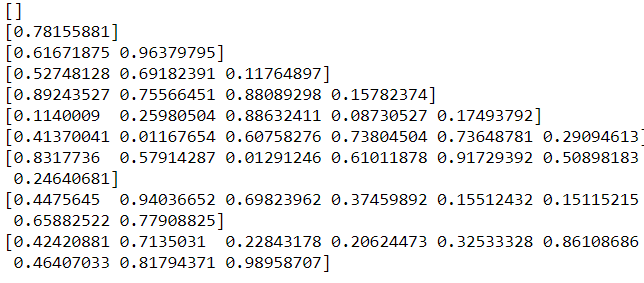

9. Rerun the numbers with a large number of iterations and use cProfile to view a breakdown of what is taking time to execute.

> **Note:** The solution for this activity can be found in the next section. Your result might be different than the one presented here.


1. Create a new conda environment called my_env:

> conda create -n my_env

2. Activate the conda environment:

> conda activate my_env

3. Install numpy in your new environment:

> conda install numpy

4. Next, install and run a jupyter Notebook from within your virtual environment:

> conda install jupyter

> jupyter notebook


In [17]:
import threading
import queue
import cProfile
import itertools
import numpy as np
np.random.seed(0)

In [18]:
in_queue = queue.Queue()
out_queue = queue.Queue()
def random_number_threading():
    while True:
        n = in_queue.get()
        if n == 'STOP':
            return
        random_numbers = np.random.rand(n)
        out_queue.put(random_numbers)

In [19]:
def generate_random_numbers(show_output, up_to):
    thread = threading.Thread(target=random_number_threading)
    thread.start()
    for i in range(up_to):
        in_queue.put(i)
        random_nums = out_queue.get()
        if show_output:
            print(random_nums)
    in_queue.put('STOP')
    thread.join()

In [20]:
generate_random_numbers(True, 10)


[]
[0.5488135]
[0.71518937 0.60276338]
[0.54488318 0.4236548  0.64589411]
[0.43758721 0.891773   0.96366276 0.38344152]
[0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
[0.0871293  0.0202184  0.83261985 0.77815675 0.87001215 0.97861834]
[0.79915856 0.46147936 0.78052918 0.11827443 0.63992102 0.14335329
 0.94466892]
[0.52184832 0.41466194 0.26455561 0.77423369 0.45615033 0.56843395
 0.0187898  0.6176355 ]
[0.61209572 0.616934   0.94374808 0.6818203  0.3595079  0.43703195
 0.6976312  0.06022547 0.66676672]


In [21]:
cProfile.run('generate_random_numbers(False, 20000)')


         740056 function calls in 3.720 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.053    0.053    3.720    3.720 <ipython-input-19-04f1b90debed>:1(generate_random_numbers)
        1    0.000    0.000    3.720    3.720 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 _weakrefset.py:38(_remove)
        1    0.000    0.000    0.000    0.000 _weakrefset.py:81(add)
    20001    0.072    0.000    0.295    0.000 queue.py:115(put)
    20000    0.106    0.000    3.371    0.000 queue.py:147(get)
    40000    0.024    0.000    0.032    0.000 queue.py:202(_qsize)
    20001    0.012    0.000    0.016    0.000 queue.py:206(_put)
    20000    0.012    0.000    0.017    0.000 queue.py:210(_get)
        1    0.000    0.000    0.000    0.000 threading.py:1024(join)
        1    0.000    0.000    0.000    0.000 threading.py:1062(_wait_for_tstate_lock)
        1    0.000    0.000    0.000    0.000 threadi

## Summary


In this chapter, you have seen some of the tools and skills needed to transition from being a Python programmer to a Python software engineer. You have learned how to collaborate with other programmers using Git and GitHub, and how to manage dependencies and virtual environments with conda. You have explored multiprocessing and investigated tools and techniques used for improving the performance of your Python code. These new skills leave you better equipped to handle the messy real world of collaborative teams working on large problems in production environments. These skills are not just academic but are essential tools for any aspiring Python developer to familiarize themselves with.

The next chapter begins the part of the course on using Python for data science. You will learn about popular libraries for working with numerical data, and techniques to import, explore, clean up, and analyze real-world data.